In [4]:
import pandas as pd
df = pd.read_csv("processed.hungarian.data",sep=",",
                 names = ["age","gender","cp","trestbps",
                          "chol","fbs","restecg","thalach",
                          "exang","oldpeak","slope","ca",
                          "thal","num"])



In [5]:
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [1]:
?"import re
import requests

In [13]:
pattern = re.compile("\d{3}-\d{4}")
response = requests.get("http://departmentsdirectory.usc.edu/pres_off.html")

In [14]:
pattern.findall(response.text)

['740-2111',
 '821-1342',
 '740-2111',
 '740-2111',
 '740-2111',
 '740-2111',
 '740-2111',
 '740-2111',
 '740-2111',
 '740-2111',
 '740-2111',
 '740-9749',
 '740-2505',
 '740-6942',
 '821-1340',
 '821-6292',
 '740-2111']

In [16]:
import numpy as np

In [17]:
def replace_question_mark(val):
    if val == "?":
        return np.NaN
    elif type(val)==int:
        return val
    else:
        return float(val)

df2 = df.copy()
for (columnName, _) in df2.iteritems():
    df2[columnName] = df2[columnName].apply(replace_question_mark)

In [19]:
df2.dropna().shape

(1, 14)

In [20]:
df2.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0


In [21]:
df2.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,293.000000,271.000000,286.000000,293.000000,293.000000,293.000000,294.000000,104.000000,3.0,28.000000,294.000000
mean,47.826531,0.724490,2.982993,132.583618,250.848708,0.069930,0.218430,139.129693,0.303754,0.586054,1.894231,0.0,5.642857,0.360544
std,7.811812,0.447533,0.965117,17.626568,67.657711,0.255476,0.460868,23.589749,0.460665,0.908648,0.338995,0.0,1.615074,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,1.000000,0.0,3.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,122.000000,0.000000,0.000000,2.000000,0.0,5.250000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,243.000000,0.000000,0.000000,140.000000,0.000000,0.000000,2.000000,0.0,6.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,282.500000,0.000000,0.000000,155.000000,1.000000,1.000000,2.000000,0.0,7.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,0.0,7.000000,1.000000


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

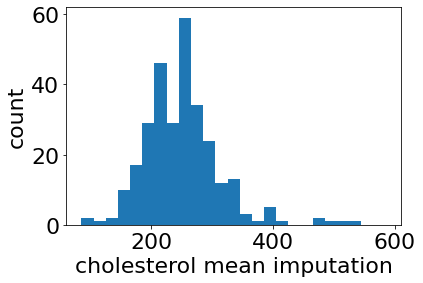

In [25]:
chol = df2["chol"]
plt.hist(chol.apply(lambda x: 250.84 if np.isnan(x) else x),
         bins=range(int(min(chol)),int(max(chol))+1,20))
plt.xlabel("cholesterol mean imputation")
plt.ylabel("count");

In [26]:
np.median(chol.dropna())

243.0

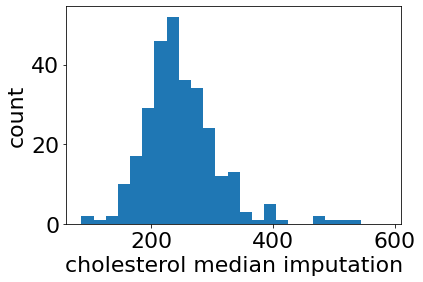

In [27]:
chol = df2["chol"]
plt.hist(chol.apply(lambda x: 243 if np.isnan(x) else x),
         bins=range(int(min(chol)),int(max(chol))+1,20))
plt.xlabel("cholesterol median imputation")
_ = plt.ylabel("count")

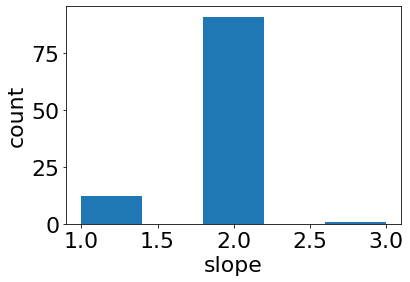

In [28]:
plt.hist(df2["slope"],bins = 5)
plt.xlabel("slope")
plt.ylabel("count");

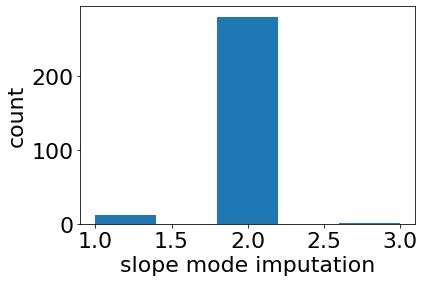

In [29]:
plt.hist(df2["slope"].apply(lambda x: 2 if np.isnan(x) else x),bins=5)
plt.xlabel("slope mode imputation")
plt.ylabel("count");

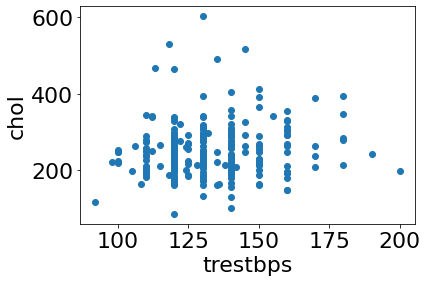

In [30]:
plt.scatter(df2["trestbps"],df2["chol"])
plt.xlabel("trestbps")
plt.ylabel("chol");

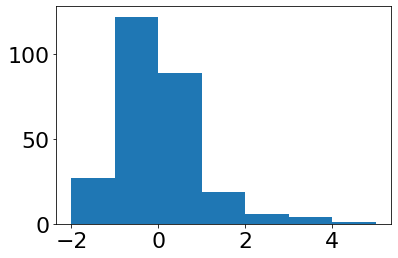

In [31]:
stdChol = np.std(chol)
meanChol = np.mean(chol)
chol2 = chol.apply(lambda x: (x-meanChol)/stdChol)
plt.hist(chol2,bins=range(int(min(chol2)), int(max(chol2))+1, 1));

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

In [33]:
imputer.fit(df2)
df3 = pd.DataFrame(imputer.transform(df2))

In [34]:
np.sum(np.sum(np.isnan(df3)))

0

In [35]:
from sklearn import preprocessing

In [36]:
df4 = pd.DataFrame(preprocessing.scale(df2))

In [37]:
df4.mean(axis=0)

0     4.350262e-16
1     1.344352e-16
2    -2.582968e-16
3    -4.402053e-16
4    -2.335155e-17
5    -3.827552e-16
6    -9.093977e-18
7     1.417145e-16
8    -1.123106e-15
9     2.601849e-16
10    7.002945e-16
11    0.000000e+00
12   -1.427430e-16
13   -1.589054e-15
dtype: float64

In [38]:
df4.std(axis=0)

0     1.001705
1     1.001705
2     1.001705
3     1.001711
4     1.001850
5     1.001753
6     1.001711
7     1.001711
8     1.001711
9     1.001705
10    1.004843
11    0.000000
12    1.018350
13    1.001705
dtype: float64

In [39]:
minMaxScaler = preprocessing.MinMaxScaler()
df5 = pd.DataFrame(minMaxScaler.fit_transform(df2))